# Pipeline mínimo com Stable Diffusion v1-4
Este notebook mostra o fluxo essencial para gerar imagens via Diffusers: instalação opcional das dependências, configuração do dispositivo, carregamento do pipeline pré-treinado e geração/armazenamento do resultado. As células a seguir explicam cada etapa para que você possa adaptar prompts, tokens e gerenciamento de arquivos facilmente.

### Dependências
Use esta célula apenas se o ambiente ainda não tiver `diffusers`, `transformers`, `torch`, `scipy` e `Pillow`. Em notebooks hospedados (Colab/Kaggle), execute-a uma vez por sessão.

In [1]:
# !pip install diffusers transformers torch scipy Pillow


### Imports principais
Carregamos PyTorch para inferência, o `StableDiffusionPipeline` da biblioteca Diffusers e utilitários do IPython para exibir a imagem diretamente no notebook.

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import Image as IPyImage, display
from datetime import datetime


2025-11-14 09:59:16.253583: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-14 09:59:16.288796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-14 09:59:17.072691: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### Seleção automática do dispositivo
Ajustamos o pipeline para usar GPU (`cuda`) quando disponível, caso contrário utilizamos `mps` (Apple Silicon) ou CPU. Essa verificação evita erros ao mover o modelo entre dispositivos.

In [3]:
# Configurar o dispositivo para GPU, MPS ou CPU
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'


### Carregando o modelo
Baixamos o pipeline `CompVis/stable-diffusion-v1-4` da Hugging Face, que exige autenticação prévia e aceite dos termos. Depois transferimos o pipeline para o dispositivo escolhido para acelerar a inferência.

In [4]:
# Carregar o modelo pré-treinado do Stable Diffusion
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Definindo o prompt
Substitua a string pelo cenário que deseja gerar. Experimente variar estilos ("digital art", "photorealistic"), artistas ou descrições detalhadas para guiar melhor o modelo.

In [10]:
# Gerar uma imagem a partir de um prompt de texto
prompt = "Iron Man teaching a child how to fly."
image = pipe(prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

### Salvando com timestamp
A cada execução criamos um nome único contendo data e hora (`YYYYMMDD-HHMM`). Dessa forma preservamos todas as gerações sem sobrescrever arquivos anteriores.

In [11]:
# Salvar a imagem gerada
timestamp = datetime.now().strftime('%Y%m%d-%H%M')
output_filename = f"generated_image_{timestamp}.png"
image.save(output_filename)
print(f"Imagem gerada e salva como '{output_filename}'.")


Imagem gerada e salva como 'generated_image_20251114-1021.png'.


### Conferindo o arquivo
Podemos listar o arquivo salvo para garantir que o nome com timestamp foi criado corretamente.

In [12]:
# Listar o arquivo salvo para verificar se foi salvo corretamente
from pathlib import Path
saved_file = Path(output_filename)
if saved_file.exists():
    print(f'Arquivo salvo em: {saved_file.resolve()}')
    print(f'Tamanho: {saved_file.stat().st_size / 1024:.2f} KB')
else:
    print('Arquivo não encontrado. Execute novamente a célula de geração.')


Arquivo salvo em: /home/carloslessa/FCD/POSTECH/modulo4/04-GenerativeIA/generated_image_20251114-1021.png
Tamanho: 372.93 KB


### Visualizando no notebook
Utilizamos o IPython.display para mostrar a imagem gerada imediatamente após o salvamento.

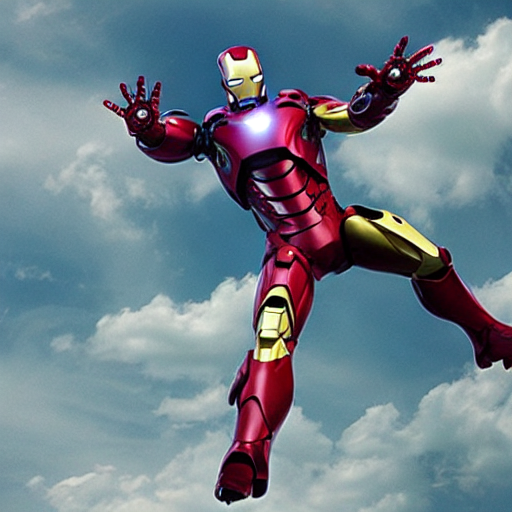

In [13]:
# Exibir a imagem gerada no notebook
display(IPyImage(filename=output_filename))


In [9]:
# Se necessário, baixar a imagem
# files.download(output_filename)


## Próximos passos
- Ajuste `guidance_scale`, número de passos de inferência e prompt para explorar estilos diferentes.
- Salve o prompt usado juntamente com o arquivo (ex.: metadados ou `.txt`) para reproduzir resultados.
- Automatize a limpeza de cache do Diffusers se estiver com pouco espaço.